# 의사결정 트리

- 결정 트리(decision tree)는 분류와 회귀 작업 그리고 다중 출력 작업까지 가능한 다목적 머신러닝 알고리즘
- 랜덤 포레스트의 기본 구성 요소

## 결정 트리 학습과 시각화
- 결정 트리를 이해하기 위해, 붓꽃 데이터에 DecisionTreeClassifier을 적용 시켜 시각화 해보자

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

X_iris, y_iris = load_iris(as_frame=True, return_X_y=True)
X_iris = X_iris[['petal length (cm)', 'petal width (cm)']]

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

- export_graphviz() 함수로 그래프 정의를 iris_tree.dot 파일로 출력하여 훈련 결정 트리를 시각화

In [17]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf, 
    out_file='iris_tree.dot',
    feature_names=['꽃잎 길이 (cm)', '꽃잎 너비 (cm)'], 
    class_names=['setosa', 'versicolor', 'virginica'],
    rounded=True,
    filled=True
)

- graphvis.Source.from_file()를 사용 주피터 노트북에 파일 로드하고 표시
- !pip install graphviz

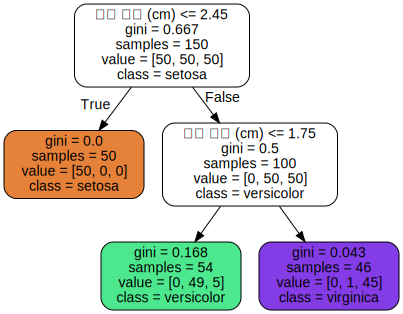

In [28]:
from graphviz import Source

Source.from_file('iris_tree.dot')

## 예측
- 꽃일을 기준으로 하여 새로 발견한 붓꽃의 품종을 분류 하려 한다고 가정 한다.
- 루트 노드(root_node, 깊이가 0인 맨 꼭대기의 노드)에서 시작
- 이 노드는 꽃잎의 길이가 2.45 보다 짧은지 검사
    - 그렇다면, 루트 노드에서 왼쪽 자식 노드(child node, 깊이 1의 왼쪽 노드)로 이동
    - 이 경우 이 노드가 리프 노드(leaf node, 자식을 가지지 않는 노드)가 되어 추가 검사를 하지 않는다
    - 그냥 노드에 있는 예측 클래스를 보고 결정 트리가 새로 발견된 꽃의 품종을 setosa로 결정 한다.
- 꽃잎의 길이가 2.45 보다 길다면
    - 루트 노드에서 오른쪽 자식 노드로 이동
    - 이 노드는 리프 노드가 아니고 분할 노드
        - 추가로 꽃잎 너비가 1.75 보다 작으면
        - 왼쪽 자식 노드로 이동, 클래스는 versicolor
        - 아니면 오른쪽으로 이동, 클래스는 virginica

> 결정 트리의 한 가지 장점은 데이터 전처리가 거의 필요 없다는 점.

- 지니 불순도(Gini impurity)는 결정 트리에서 노드의 순도를 측정하는 기준 중 하나입니다. 지니 불순도는 특정 노드에서 잘못 분류될 확률을 나타내며, 해당 노드에 포함된 샘플들이 얼마나 혼합되어 있는지를 나타냅니다. 지니 불순도가 낮을수록 노드가 더 순수하다는 것을 의미합니다.

지니 불순도의 수식은 다음과 같습니다:

$ G = 1 - \sum_{i=1}^{n} p_i^2 $

여기서:
- $ G $는 지니 불순도입니다.
- $ n $은 노드에 있는 클래스의 개수입니다.
- $ p_i $는 노드에 있는 클래스 $ i $의 비율입니다.

### 루트 노드
- 조건: `꽃잎 길이 (cm) <= 2.45`
- 지니 불순도: 0.667
- 샘플 수: 150
- 클래스 분포: `[50, 50, 50]` (setosa, versicolor, virginica)

지니 불순도 계산:
$ G = 1 - (p_{\text{setosa}}^2 + p_{\text{versicolor}}^2 + p_{\text{virginica}}^2) $

$ p_{\text{setosa}} = \frac{50}{150} = 0.333 $

$ p_{\text{versicolor}} = \frac{50}{150} = 0.333 $

$ p_{\text{virginica}} = \frac{50}{150} = 0.333 $

$ G = 1 - (0.333^2 + 0.333^2 + 0.333^2) $

$ G = 1 - (0.111 + 0.111 + 0.111) = 1 - 0.333 = 0.667 $

### 왼쪽 자식 노드
- 조건: `꽃잎 길이 (cm) <= 2.45` 참
- 지니 불순도: 0.0
- 샘플 수: 50
- 클래스 분포: `[50, 0, 0]` (setosa)

지니 불순도 계산:
$ G = 1 - (p_{\text{setosa}}^2 + p_{\text{versicolor}}^2 + p_{\text{virginica}}^2) $

$ p_{\text{setosa}} = \frac{50}{50} = 1 $

$ p_{\text{versicolor}} = \frac{0}{50} = 0 $

$ p_{\text{virginica}} = \frac{0}{50} = 0 $

$ G = 1 - (1^2 + 0^2 + 0^2) $

$ G = 1 - 1 = 0 $

### 오른쪽 자식 노드
- 조건: `꽃잎 길이 (cm) <= 2.45` 거짓
- 지니 불순도: 0.5
- 샘플 수: 100
- 클래스 분포: `[0, 50, 50]` (setosa, versicolor, virginica)

지니 불순도 계산:
$ G = 1 - (p_{\text{setosa}}^2 + p_{\text{versicolor}}^2 + p_{\text{virginica}}^2) $

$ p_{\text{setosa}} = \frac{0}{100} = 0 $

$ p_{\text{versicolor}} = \frac{50}{100} = 0.5 $

$ p_{\text{virginica}} = \frac{50}{100} = 0.5 $

$ G = 1 - (0^2 + 0.5^2 + 0.5^2) $

$ G = 1 - (0 + 0.25 + 0.25) = 1 - 0.5 = 0.5 $

### 오른쪽 자식 노드의 왼쪽 자식 노드
- 조건: `꽃잎 너비 (cm) <= 1.75` 참
- 지니 불순도: 0.168
- 샘플 수: 54
- 클래스 분포: `[0, 49, 5]` (setosa, versicolor, virginica)

지니 불순도 계산:
$ G = 1 - (p_{\text{setosa}}^2 + p_{\text{versicolor}}^2 + p_{\text{virginica}}^2) $

$ p_{\text{setosa}} = \frac{0}{54} = 0 $

$ p_{\text{versicolor}} = \frac{49}{54} \approx 0.907 $

$ p_{\text{virginica}} = \frac{5}{54} \approx 0.093 $

$ G = 1 - (0^2 + 0.907^2 + 0.093^2) $

$ G = 1 - (0 + 0.822 + 0.009) = 1 - 0.831 = 0.169 $

### 오른쪽 자식 노드의 오른쪽 자식 노드
- 조건: `꽃잎 너비 (cm) <= 1.75` 거짓
- 지니 불순도: 0.043
- 샘플 수: 46
- 클래스 분포: `[0, 1, 45]` (setosa, versicolor, virginica)

지니 불순도 계산:
$ G = 1 - (p_{\text{setosa}}^2 + p_{\text{versicolor}}^2 + p_{\text{virginica}}^2) $

$ p_{\text{setosa}} = \frac{0}{46} = 0 $

$ p_{\text{versicolor}} = \frac{1}{46} \approx 0.022 $

$ p_{\text{virginica}} = \frac{45}{46} \approx 0.978 $

$ G = 1 - (0^2 + 0.022^2 + 0.978^2) $

$ G = 1 - (0 + 0.0005 + 0.957) = 1 - 0.9575 = 0.0425 $

- 다음은, 이 결정 트리의 결정 경계 표시
- 왼쪽은 순수한 setosa 만 있어 더 이상 나눌 수 없음
- 오른쪽은 max_depth=2로 설정 되어, 두번 더 나누어 짐

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


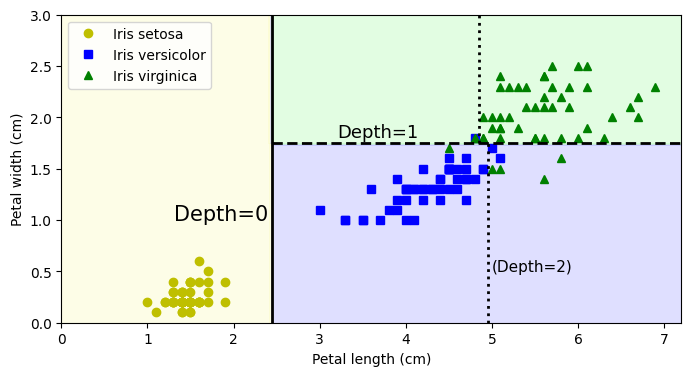

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 추가 코드 - 세부 서식 지정
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(['setosa', 'versicolor', 'virginica'], ("yo", "bs", "g^"))):
    plt.plot(X_iris.values[y_iris == idx, 0], X_iris.values[y_iris == idx, 1],
             style, label=f"Iris {name}")

# 추가 코드 - 이 섹션에서는 그림 6-2를 아름답게 꾸미고 저장합니다.
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

- 추가적인 정보

In [36]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [38]:
tree_clf.tree_.n_leaves

3

## 클래스 확률 추정
- 특정 샘플이 특정 클래스에 속할 확률을 추정 가능 하다.
- 해당 샘플의 리프 노드를 찾기 위해 트리를 탐색하고, 그 노드에 있는 클래스의 훈련 샘플의 비율을 반환 한다.
- 예를 들어, 길이가 5cm, 너비가 1.5cm 인 꽃잎
- 깊이 2의, 왼쪽 노드
- setosa : 0% (0/54), versicolor : 90.7%(49/54), virginica : 9.3% (5/54)

In [39]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.   , 0.907, 0.093]])

In [41]:
tree_clf.predict([[5, 1.5]])

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## CART 훈련 알고리즘
- 사이킷런은 결정 트리 훈련을 위해 CART(Classification and regression tree) 사용
- 탐욕 알고리즘(greedy algorithm)으로 맨 위 루트에서 최적의 분할을 찾으며 이어지는 단계에서 이 과정을 반복
- 최적의 트리를 찾는 것은 NP-완전 문제로 알려져 있음, (O(exp(m))) 의 시간 필요

### 예시: 분류 문제에서의 CART 알고리즘

1. **초기 데이터 셋:**
   - 여러 특징(feature)과 레이블(label)로 이루어진 데이터 셋을 준비합니다.

2. **최적 분할 찾기:**
   - 모든 특징의 모든 가능한 분할 지점에 대해 지니 불순도를 계산합니다.
   - 예를 들어, 꽃잎 길이(petal length)와 꽃잎 너비(petal width)를 가진 아이리스 데이터 셋을 분류한다고 가정해 봅시다.

3. **첫 번째 분할:**
   - 지니 불순도가 가장 낮은 분할을 선택합니다. 예를 들어, 꽃잎 길이(petal length) <= 2.45를 첫 번째 분할 기준으로 선택할 수 있습니다.

4. **반복적 분할:**
   - 각 자식 노드에서 동일한 과정을 반복합니다. 예를 들어, 꽃잎 길이(petal length) > 2.45인 경우, 꽃잎 너비(petal width) <= 1.75를 두 번째 분할 기준으로 선택할 수 있습니다.

5. **트리 구축 완료:**
   - 모든 데이터가 순수한 노드에 도달하거나, 더 이상 분할할 수 없을 때까지 트리를 구축합니다.

6. **가지치기 (선택사항):**
   - 필요에 따라 가지치기를 수행하여 과적합을 방지하고 트리의 일반화 성능을 향상시킵니다.

## 지니 불순도 또는 엔트로피
- 엔트로피 불순도(Entropy impurity)는 정보 이론에 기반한 개념으로, 결정 트리에서 노드의 불순도를 측정하는 데 사용됩니다. 엔트로피는 노드의 데이터가 얼마나 혼합되어 있는지를 나타내며, 값이 낮을수록 노드가 더 순수함을 의미합니다. 엔트로피는 주로 이산형 데이터의 분류 문제에서 사용됩니다.

### 엔트로피 불순도의 수식

엔트로피 $ H $는 다음과 같이 정의됩니다:

$ H = -\sum_{i=1}^{n} p_i \log_2(p_i) $

여기서:
- $ H $는 엔트로피입니다.
- $ n $은 노드에 있는 클래스의 개수입니다.
- $ p_i $는 노드에 있는 클래스 $ i $의 비율입니다.

- 엔트로피 값이 낮을수록 노드가 더 순수하며, 트리는 이러한 엔트로피 값을 최소화하도록 분할됩니다. `DecisionTreeClassifier`에서 `criterion='entropy'`로 설정하면 엔트로피 불순도를 기준으로 트리를 생성합니다.

<img src="./images/fig_11_01.png">

## 규제 매개변수
- 훈련되기 전에 파라미터 수가 결정되지 않아, 비파라미터 모델(nonparametric model) 이라고 한다.
- 모델 구조가 데이터에 맞춰 고정되지 않고 자유롭다.
- 따라서 과적합 우려가 높다.
- 과적합을 막기 위해, 결정 트리의 자유도를 제한할 필요가 있다. 이를 규제라고 한다.
- DecisionTreeClassifier에서는 다음과 같은 규제에 사용할 수 있는 하이퍼파라미터가 있다.
    - max_depth : tree의 깊이
    - max_features : 각 노드에서 분할에 사용할 특성의 최대 수
    - max_leaf_nodes : 리프 노드의 최대 수
    - max_sample_split : 분할되기 위해 노드가 가져야 할 최소 샘플 수
    - max_sample_leaf : 리프 노드가 생성되기 위해 가지고 있어야 하는 최소 샘플 수
    - min_weight_fraction_leaf : min_samples_leaf와 같지만, 가중치가 부여된 전체 샘플 수에서의 비율
- **min_으로 시작하는 매개 변수를 증가 시키거나, max_로 시작하는 매개변수를 감소 시키면 모델에 대한 규제가 커진다.**

In [42]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

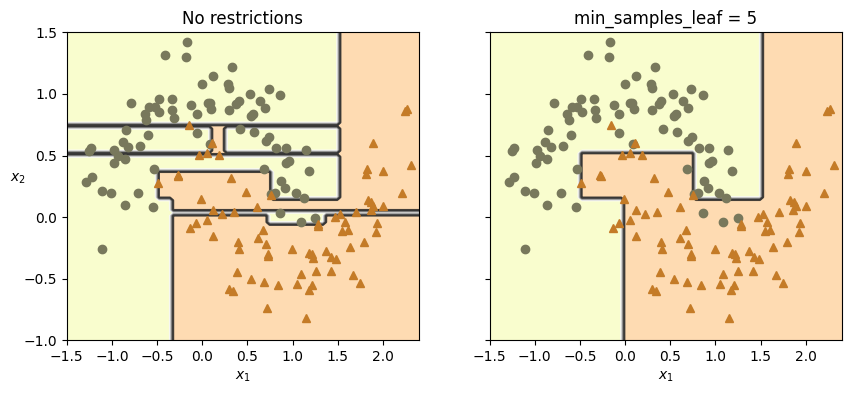

In [43]:
# 추가 코드 - 이 셀은 그림 6-3을 생성하고 저장합니다.

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

- 실제 테스트 세트의 평가에서도 두 번째 결정 트리가 더 높은 정확도

In [44]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [45]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## 회귀
- DecisionTreeRegressor 를 사용, 회귀 문제에서도 사용 가능

In [46]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # 간단한 랜덤한 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

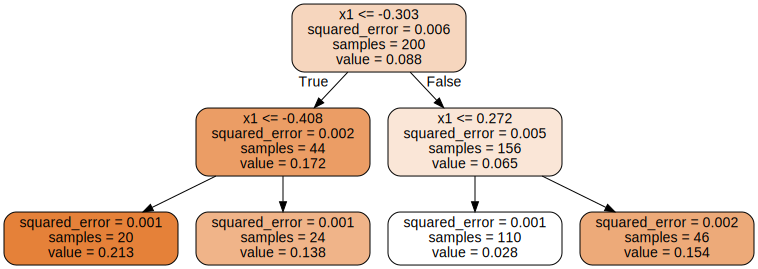

In [50]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

- 분류와 다르게, 클래스의 예측이 아닌 value의 예측을 하고 있다.
- $x_1 = 0.2$인 샘플을 예측 한다고 가정 하면

1. **루트 노드**:
   - 조건: $ x1 \leq -0.303 $
   - `x1 = 0.2`이므로, 조건이 False입니다.
   - 따라서 오른쪽 자식 노드로 이동합니다.

2. **오른쪽 자식 노드**:
   - 조건: $ x1 \leq 0.272 $
   - `x1 = 0.2`이므로, 조건이 True입니다.
   - 따라서 왼쪽 자식 노드로 이동합니다.

3. **왼쪽 자식 노드**:
   - 조건: $ x1 \leq 0.272 $이면서, `samples = 110`
   - 이 노드에서의 `value = 0.028`입니다.

따라서, `x1 = 0.2`인 샘플은 결정 트리에 따라 최종적으로 `value = 0.028`을 할당받게 됩니다.

결정 트리의 노드에서 `squared_error`는 회귀 문제에서 해당 노드의 예측값에 대한 평균 제곱 오차(Mean Squared Error, MSE)를 나타냅니다. 이 값은 노드에 속한 모든 샘플의 실제 값과 예측 값 간의 차이를 제곱한 후 평균을 낸 것입니다.

### 주어진 노드의 `squared_error`가 0.001인 이유

해당 노드의 `value`는 0.028입니다. 이 노드에 속한 모든 샘플은 이 값을 예측 값으로 받습니다. `squared_error`를 계산하기 위해 다음과 같은 과정을 거칩니다:

1. **샘플의 실제 값과 예측 값 간의 차이 계산**:
   - 각 샘플에 대해 실제 값 $ y_i $와 예측 값 $ \hat{y} $ (여기서는 0.028) 간의 차이를 구합니다.

2. **차이의 제곱 계산**:
   - 차이를 제곱하여 오차의 제곱을 구합니다.

3. **제곱 오차의 평균 계산**:
   - 모든 샘플의 제곱 오차를 평균하여 `squared_error`를 구합니다.

- CART 알고리즘은, 회귀에서 지니 불순도가 아닌 MSE를 최소화 하도록 분할을 시도 합니다.

In [52]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

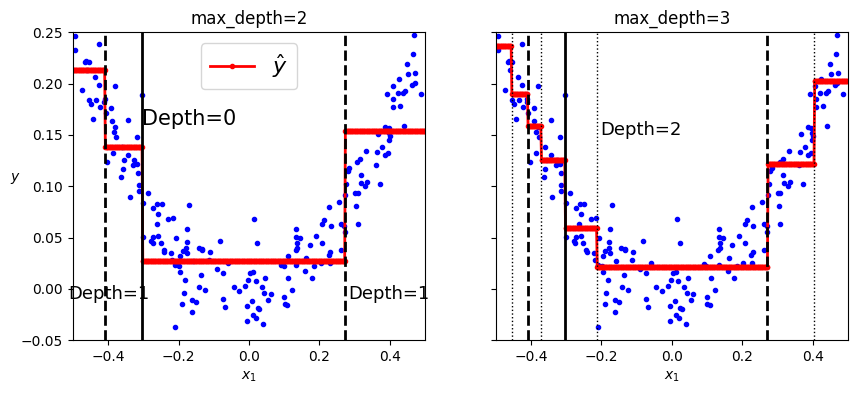

In [53]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")
plt.show()

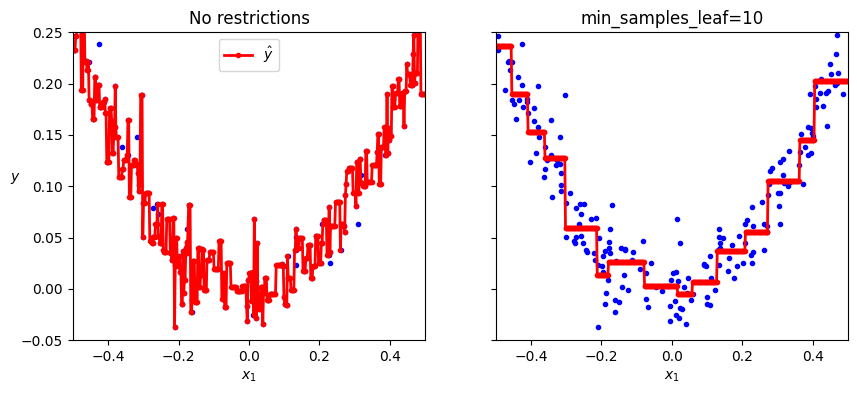

In [54]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()

## 축 방향에 대한 민감성
- 결정 트리는 계단 모양의 결정 경계를 만든다. 그래서 데이터의 방향에 민감하다.
- 즉, 다음 그림 처럼, 데이터를 45도 회전 시키게 되면 결정 트리의 경계면이 필요 이상으로 복잡해 진다.
- 과적합으로, 일반화 성능이 떨어진다.

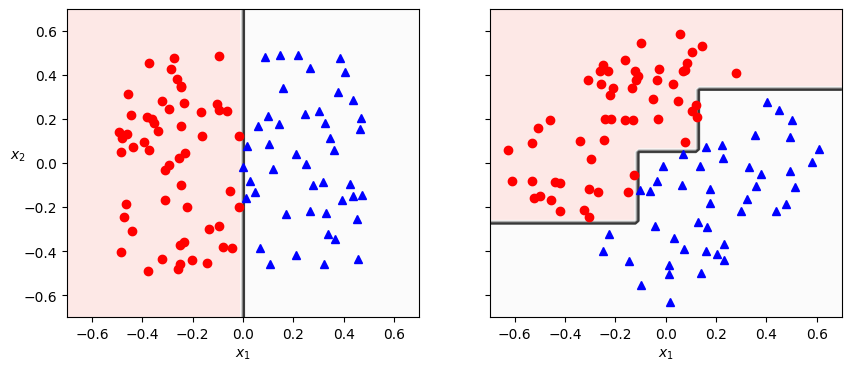

In [55]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 도
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")
plt.show()

- 데이터의 스케일을 조정하고, 주성분 분석 변환을 적용 하게 되면, 이 문제를 완화 할 수 있다.

In [56]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

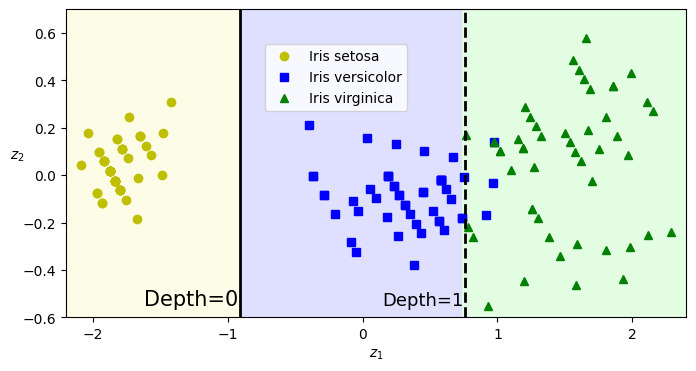

In [58]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(['setosa', 'versicolor', 'virginica'], ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
plt.show()

## 결정 트리의 분산 문제
- 결정 트리의 또 다른 문제는, 하이퍼파라미터에 민감하다는 것이다.
- 같은 데이터라 하더라도, 재 훈련시 다른 결과가 나온다.

In [59]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


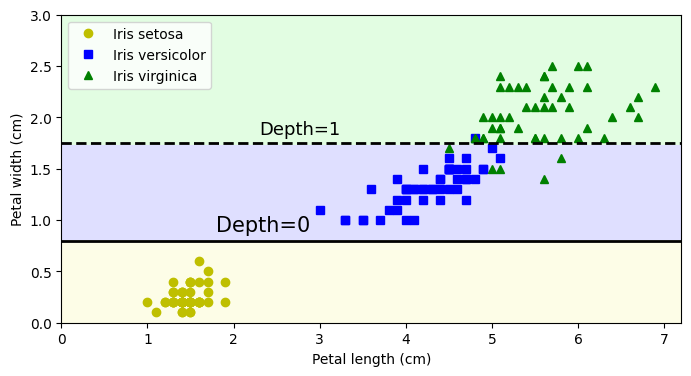

In [61]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(['setosa', 'versicolor', 'virginica'], ("yo", "bs", "g^"))):
    plt.plot(X_iris.values[y_iris == idx, 0], X_iris.values[y_iris == idx, 1], style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

# 랜덤 포레스트
- 앙상블
    - 일련의 예측기(회귀나 분류 등)로 부터 예측을 수집하면 가장 좋은 모델 하나 보다 더 좋은 예측을 얻는 것
    - 훈련 세트로 부터 랜덤으로 각기 다른 서브셋을 만들어 일련의 결정 분류기를 훈련 시킨다
    - 개별 트리의 예측을 모아 가장 많은 선택을 받은 클래스를 앙상블의 예측으로 삼는다
- 이런 결정트리의 앙상블을 랜덤 포레스트 라고 한다.

## 투표 기반 분류기

<img src="./images/fig_11_02.png" width=500>

- 정확도가 80%인 다양한 분류기 여려개를 훈련 시켰다고 가정 (SVM, 로지스틱, 랜덤 포레스트, 기타 등...)
- 더 좋은 분류기를 만드는 매우 간단한 방법은 각 분류기의 예측을 집계 하는 것
- 가장 많은 표를 얻은 클래스가 앙상블의 예측
- 이렇게 다수결 투표를 하는 분류기를 직접 투표(hart voting) 분류기 라고 한다.

<img src="./images/fig_11_03.png" width=500>

- 이런 앙상블 분류기가, 가장 뛰어난 개별 분류기 보다 더 높은 정확도를 가지는 경우가 많다.
- 약한 학습기(weak learner)일지라도 충분히 많고 다양하면 강한 학습기(strong learner)가 될 수 있다.

In [64]:
import matplotlib.pyplot as plt

def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    elif system_name == "Linux":
        font_family = "NanumGothic"
    return font_family


font_family = get_font_family()
plt.rc("font", family=font_family)
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format='retina'

- 큰수의 법칙(Law of Large Numbers)은 확률과 통계의 중요한 개념 중 하나로, 반복적인 실험을 통해 얻은 결과값이 이론적인 기대값에 수렴하는 경향을 설명합니다. 동전 던지기를 예로 들어 큰수의 법칙을 설명하겠습니다.

1. **기대값 정의**: 
   동전 던지기의 경우, 동전이 앞면(Head) 또는 뒷면(Tail)이 나올 확률은 각각 50%, 즉 0.5입니다.

2. **실험 반복**: 
   동전을 한 번 던질 때 앞면이 나올 확률은 50%입니다. 하지만 동전을 던지는 횟수가 적으면(예: 10번) 앞면과 뒷면이 나온 횟수의 비율이 50%와 크게 차이날 수 있습니다.

3. **실험 결과 분석**:
   동전 던지기 실험을 여러 번 반복해서 결과를 분석해보겠습니다. 예를 들어:
   - 10번 던졌을 때: 앞면 7번, 뒷면 3번 (앞면 비율 = 70%)
   - 100번 던졌을 때: 앞면 53번, 뒷면 47번 (앞면 비율 = 53%)
   - 1000번 던졌을 때: 앞면 502번, 뒷면 498번 (앞면 비율 = 50.2%)

4. **큰수의 법칙 적용**: 
   동전을 던지는 횟수를 점점 더 많이 늘려가면(예: 10,000번, 100,000번, 1,000,000번) 앞면이 나올 비율이 0.5에 점점 더 가까워지는 것을 볼 수 있습니다. 즉, 실험 횟수가 증가할수록 실제 결과가 기대값(50%)에 수렴하게 됩니다.

- 이것이 바로 큰수의 법칙입니다. 많은 횟수의 실험을 통해 얻은 평균값은 이론적인 기대값에 가까워진다는 것을 보여줍니다. 동전 던지기뿐만 아니라 다양한 확률적 실험에도 이 법칙이 적용됩니다.

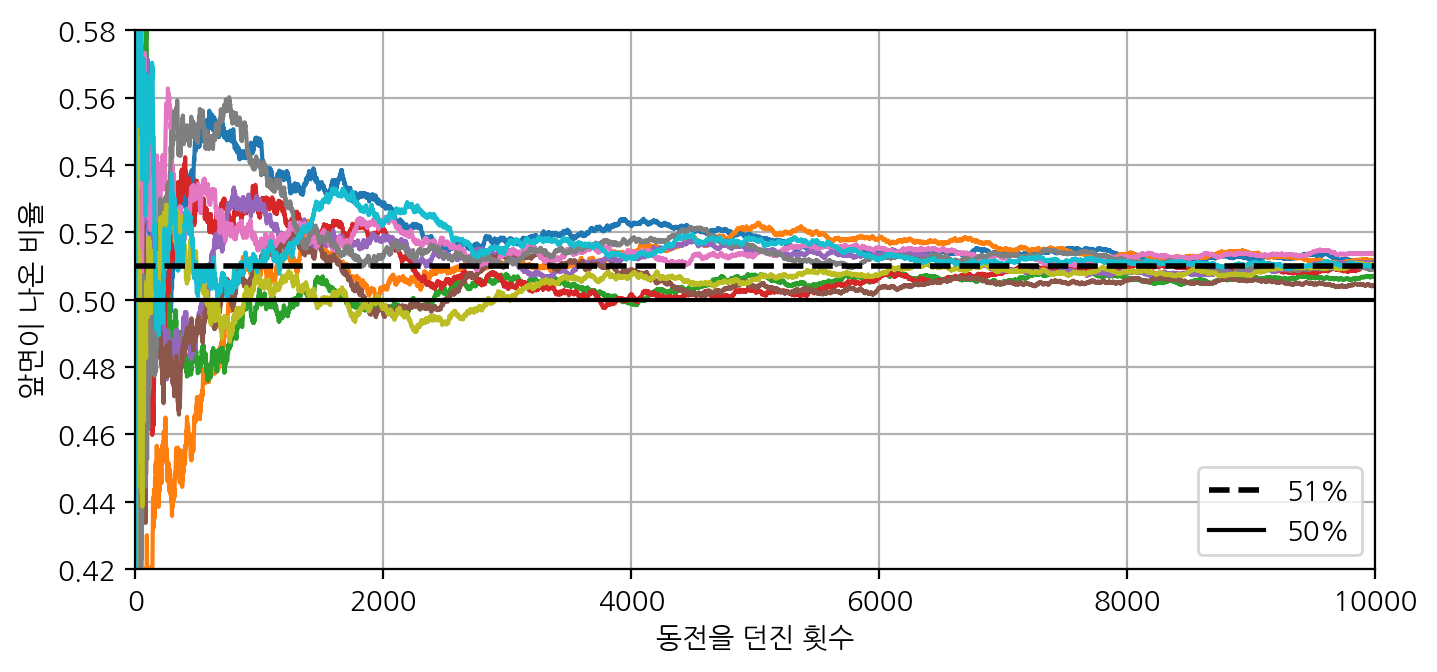

In [65]:
import numpy as np

heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("동전을 던진 횟수")
plt.ylabel("앞면이 나온 비율")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
plt.show()

- 큰수의 법칙에 근거한, 앙상블의 효과에 대한 설명
1. **가정**:
   - 51% 정확도를 가진 1,000개의 분류기로 앙상블 모델을 구축.
   - 가장 많은 클래스를 예측으로 삼으면 75%의 정확도 기대 가능.

2. **독립성의 중요성**:
   - 분류기가 완벽히 독립적이고 오차에 상관관계가 없어야 기대치 달성 가능.
   - 같은 데이터로 훈련시키면 동일한 종류의 오차 발생 가능성 높음.

3. **앙상블의 한계**:
   - 같은 종류의 오차로 인해 잘못된 클래스 예측이 많아져 정확도 낮아질 수 있음.

4. **TIP**:
   - 예측기가 독립적일 때 성능 극대화.
   - 다양한 알고리즘으로 학습시켜 다양한 분류기 얻는 것이 중요.
   - 다른 종류의 오차를 만들 가능성이 높아져 정확도 향상.

#### 이항 분포와 중심 극한 정리

1. **이항 분포**:
   - 각 분류기는 51%의 확률로 올바르게 예측하고 49%의 확률로 틀리게 예측합니다.
   - 분류기의 수가 많아지면 각 분류기의 예측은 이항 분포를 따르게 됩니다.

2. **중심 극한 정리**:
   - 분류기의 수가 충분히 많을 때, 이항 분포는 정규 분포에 근사하게 됩니다.
   - 정규 분포의 평균(μ)과 표준 편차(σ)는 각각 다음과 같습니다:
     - 평균 (μ) = n * p
     - 표준 편차 (σ) = sqrt(n * p * (1 - p))
     - 여기서 n은 분류기의 수, p는 각 분류기의 정확도입니다.

#### 75%의 계산 과정

1. **평균과 표준 편차 계산**:
   - n = 1000 (분류기의 수)
   - p = 0.51 (각 분류기의 정확도)

   따라서,
   - 평균 (μ) = 1000 * 0.51 = 510
   - 표준 편차 (σ) = sqrt(1000 * 0.51 * 0.49) ≈ 15.81

2. **정규 분포에서의 확률 계산**:
   - 다수결 투표에서 최종 예측이 올바르려면, 1,000개의 분류기 중 절반 이상(즉, 500개 이상)이 올바르게 예측해야 합니다.
   - Z-score를 이용해 500개 이상의 분류기가 올바르게 예측할 확률을 계산합니다.

     Z = (X - μ) / σ
     - 여기서 X는 500개입니다.
     - Z = (500 - 510) / 15.81 ≈ -0.63

3. **Z-score를 이용한 누적 확률 계산**:
   - Z = -0.63에 해당하는 누적 확률을 표준 정규 분포표에서 찾습니다.
   - Z = -0.63에 해당하는 누적 확률은 약 0.264입니다.
   - 이는 500개 이하의 분류기가 올바르게 예측할 확률입니다.

4. **최종 정확도 계산**:
   - 500개 이상의 분류기가 올바르게 예측할 확률은 1 - 0.264 = 0.736, 즉 약 73.6%입니다.

따라서, 독립적인 분류기들이 다수결 투표를 통해 최종 예측을 할 때, 정확도가 약 73.6%가 되는 것입니다. 여기서 75%는 이론적으로 조금 더 이상적인 상황을 가정한 근사치로 볼 수 있습니다. 실제로는 약 73.6%로 계산되지만, 이를 좀 더 간단히 설명하기 위해 75%로 표기한 것입니다.

- 사이킷런의 VotingClassifier로 투표기반 분류기 만들기

In [66]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

- VotingClassifier는 훈련 시 모든 추정기를 복제하여 복제된 추정기를 훈련
- 원본 추정기는 estimators 속석을 통해 참조 가능
- 훈련된 복사본은 estimators_ 속성에 저장
- 리스트 대신 딕셔너리를 전달하는 경우 named_estimators 또는 named_estimators_ 통해 사용 가능
- 각 분류기의 정확도

In [67]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


- predict() 메서드를 통해 직접 투표 수행

In [69]:
voting_clf.predict(X_test[:1])

array([1])

- 세 분류기 중 두개가 1을 선택

In [70]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

- 테스트세트 에서의 성능, 각각 보다 더 높다

In [72]:
voting_clf.score(X_test, y_test)

0.912

- 확률을 기반으로, 가장 높은 확률을 보이는 클래스 선택 하는 간접 투표(soft voting)

In [73]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

## 배깅과 페이스팅

- 배깅(bagging - bootstrap aggregation) : 같은 알고리즘을 사용하되, 훈련 세트를 랜덤하게 구성하여 각기 학습시킨 분류기를 앙상블을 하는 방법
- 이 중, 중복은 허용하지 않는 샘플링 방식을 페시스팅(pasting)
- 배깅은 한 훈련기를 위해 동일 샘플을 여러번 사용하지 않는다.

<img src='./images/fig_11_04.png' width=500>

- 분류는 통계적 최빈값, 회귀는 평균을 계산

### 사이킷런의 배깅과 페이스팅
- 사이킷런은 BaggingClassifier(BaggingRegressor)를 제공
- 다음은 결정 트리 분류기 500개의 앙상블을 훈련시키는 코드

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

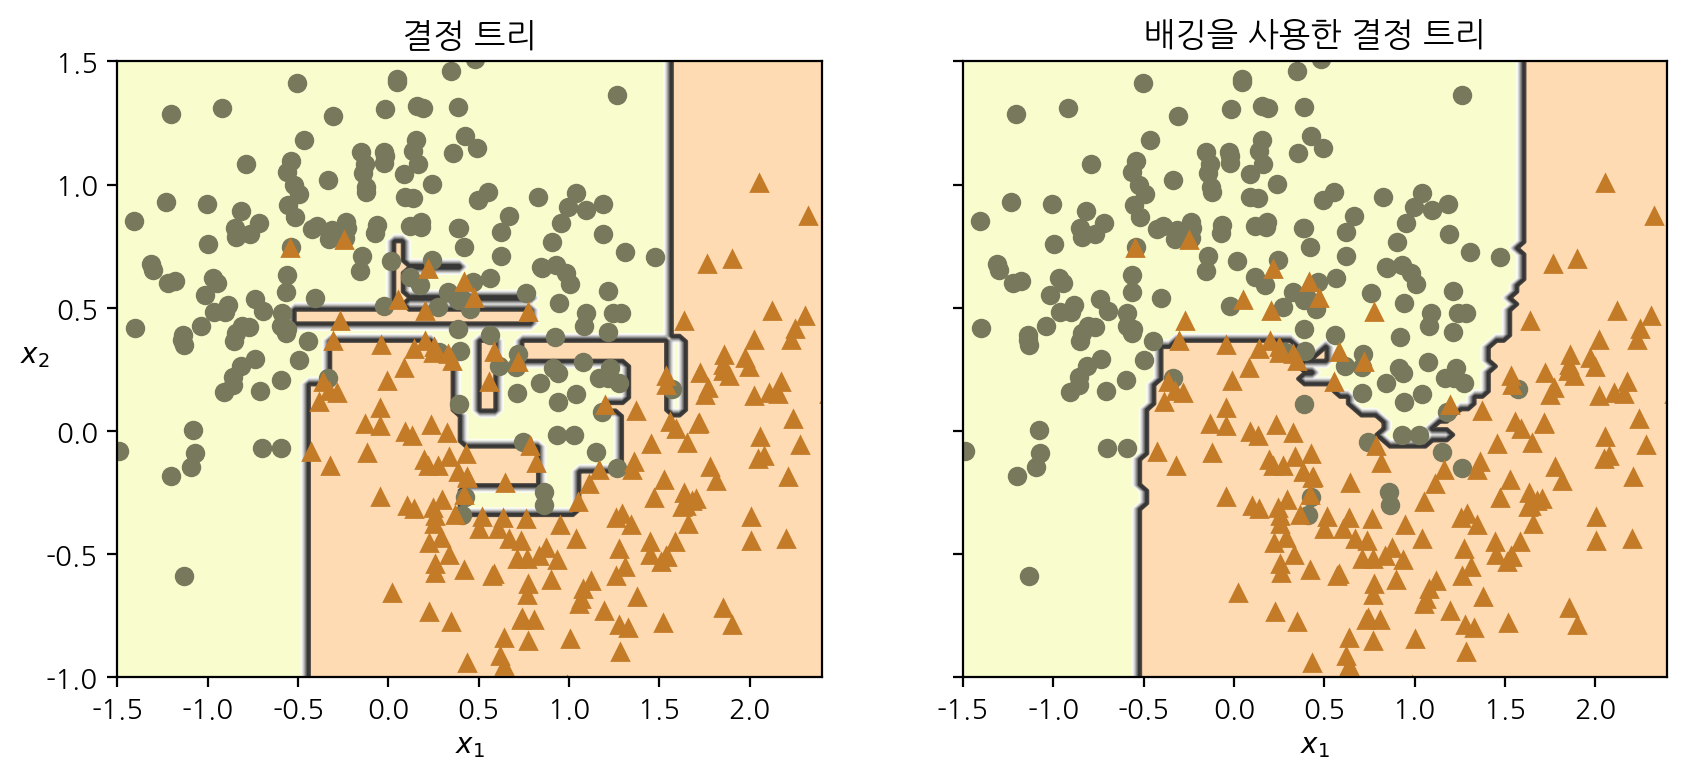

In [75]:
# 추가 코드 - 이 셀은 그림 7-5를 생성하고 저장합니다.

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("결정 트리")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("배깅을 사용한 결정 트리")
plt.ylabel("")
plt.show()

- 앙상블의 예측이 결정 트리 하나의 예측보다 일반화가 더 잘된다.
- 앙상블은 비슷한 편향에서 더 작은 분산을 만든다
    - 훈련 세트의 오차 수가 거의 동일하지만 결정 경계는 덜 불규칙 하다.

### OOB 평가
- 배깅을 사용하면 어떤 샘플은 여러번 사용되지만, 한번도 사용되지 않는 샘플도 있다.

### 배깅에서 샘플링 과정

1. **기본 개념**:
   - 데이터셋의 크기를 $ N $이라고 하겠습니다.
   - 부트스트랩 샘플도 $ N $개의 데이터 포인트로 구성됩니다.

2. **각 데이터 포인트의 선택 확률**:
   - 데이터셋에서 각 데이터 포인트가 한 번 선택될 확률은 $ \frac{1}{N} $입니다.

3. **포함되지 않을 확률**:
   - 각 데이터 포인트가 한 번 선택되지 않을 확률은 $ 1 - \frac{1}{N} $입니다.
   - $ N $번의 선택 과정에서 특정 데이터 포인트가 한 번도 선택되지 않을 확률은 $ \left(1 - \frac{1}{N}\right)^N $입니다.

4. **자연상수 $e$와의 관계**:
   - $ \left(1 - \frac{1}{N}\right)^N $는 $ N $이 무한히 커질 때 자연상수 $ e $의 음수 제곱으로 수렴합니다.
   - 즉, 
     $
     \lim_{N \to \infty} \left(1 - \frac{1}{N}\right)^N = \frac{1}{e} \approx 0.3679
     $

5. **포함되지 않을 확률**:
   - 따라서, 각 데이터 포인트가 부트스트랩 샘플에 포함되지 않을 확률은 약 0.368, 즉 36.8%입니다.

6. **포함될 확률**:
   - 반대로, 각 데이터 포인트가 적어도 한 번 부트스트랩 샘플에 포함될 확률은 
     $
     1 - \frac{1}{e} \approx 1 - 0.368 = 0.632
     $
   - 즉, 63.2%입니다.

### 결론
배깅 과정에서 각 부트스트랩 샘플은 원래 데이터셋의 약 63.2%의 데이터 포인트를 포함하고, 나머지 36.8%의 데이터 포인트는 포함되지 않습니다. 이 36.8%의 데이터 포인트가 OOB(Out-Of-Bag) 샘플을 형성하며, 이는 모델 평가에 사용됩니다.

따라서, 배깅에서는 자연상수 $e$를 통해 데이터 포인트가 부트스트랩 샘플에 포함되지 않을 확률을 계산할 수 있으며, 그 결과 약 63%의 데이터만이 샘플에 포함된다는 것을 알 수 있습니다.

- 사이킷런에서 BaggingClassifier를 만들 때, oob_score=True 로 설정하면 훈련이 끝난 후 자동으로 OOB 평가 수행

In [76]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

- OOB 평가로 89.6%

In [81]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

- test 세트는 92%

## 랜덤 패치와 랜덤 서브스페이스

### 랜덤 패치 방식 (Random Patches Method)

1. **설명**:
   - 데이터 샘플뿐만 아니라 특성(feature)도 샘플링하여 모델을 학습시키는 방법입니다.
   - 예를 들어, 이미지 데이터의 경우 일부 픽셀(특성)만을 사용하여 모델을 훈련시킵니다.

2. **필요성**:
   - **다양성 증가**: 각 모델이 서로 다른 데이터와 특성으로 학습되므로, 모델 간의 다양성이 증가합니다.
   - **과적합 방지**: 다양한 특성을 사용함으로써 특정 데이터에 과적합되는 것을 방지합니다.

### 랜덤 서브스페이스 방식 (Random Subspaces Method)

1. **설명**:
   - 모든 데이터 샘플을 사용하지만, 특성(feature)의 일부만을 샘플링하여 모델을 학습시키는 방법입니다.
   - 예를 들어, 여러 특성 중 일부만을 선택하여 모델을 훈련시킵니다.

2. **필요성**:
   - **고차원 데이터 처리**: 특히 특성이 많은 고차원 데이터셋에서 훈련 속도를 높이고 모델의 성능을 향상시킵니다.
   - **편향-분산 트레이드오프**: 편향은 약간 증가할 수 있지만, 분산이 크게 감소하여 전체적인 예측 성능이 향상됩니다.

### 효과

- **훈련 속도 향상**: 샘플링 기법을 통해 훈련 데이터를 줄여 더 빠르게 모델을 학습시킬 수 있습니다.
- **예측 성능 향상**: 다양한 특성과 데이터를 사용하여 예측 성능을 높일 수 있습니다.
- **과적합 방지**: 다양한 모델을 결합함으로써 특정 데이터에 과적합되는 것을 막을 수 있습니다.

결론적으로, 랜덤 패치와 랜덤 서브스페이스 방법은 데이터를 다양한 방식으로 샘플링하여 모델의 다양성과 성능을 높이고, 과적합을 방지하는 데 유용한 방법입니다.

## 랜덤 포레스트

**랜덤 포레스트**는 앙상블 학습 방법의 하나로, 여러 개의 결정 트리(decision tree)를 결합하여 예측 성능을 높이는 방법입니다. 항목별로 정리하면 다음과 같습니다.

1. **기본 개념**:
   - 여러 개의 결정 트리를 생성하고, 이들의 예측을 결합하여 최종 예측을 도출하는 앙상블 방법.

2. **핵심 요소**:
   - **부트스트랩 샘플링(Bootstrap Sampling)**:
     - 각 트리를 훈련시킬 때 원래 데이터셋에서 랜덤하게 샘플을 복원 추출하여 새로운 데이터셋을 만듦.
   - **랜덤 특성 선택(Random Feature Selection)**:
     - 각 노드를 분할할 때, 모든 특성이 아니라 랜덤하게 선택된 일부 특성들 중에서 최적의 분할을 찾음.

3. **장점**:
   - **과적합 방지**: 여러 트리를 결합하여 개별 트리의 과적합을 줄임.
   - **높은 예측 성능**: 다수결 또는 평균을 통해 최종 예측을 도출하여 예측 성능 향상.
   - **다양성 확보**: 부트스트랩 샘플링과 랜덤 특성 선택을 통해 모델 간 다양성 증가.

4. **적용 분야**:
   - 분류(Classification)와 회귀(Regression) 문제 모두에 사용 가능.
   - 데이터셋의 크기나 특성의 수가 많아도 효과적으로 적용 가능.

5. **훈련 및 예측 과정**:
   - **훈련**: 여러 개의 결정 트리를 각각 다른 부트스트랩 샘플과 랜덤 특성을 사용하여 훈련.
   - **예측**: 분류 문제에서는 다수결 투표로, 회귀 문제에서는 평균값으로 최종 예측 도출.

6. **평가 방법**:
   - **Out-of-Bag (OOB) Error**: 부트스트랩 샘플링에서 제외된 데이터를 사용하여 모델의 성능을 평가.
  
- 다음은 RandomForestClassifier 의 예제

In [82]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

- 전체 특성을 사용하는 대신, 랜덤으로 선택된 특성 후보 중에서 최적의 특성을 찾는 식으로 무작위설을 더 주입
- 보통 $\sqrt(n)$ 개의 특성(n은 전체 특성 개수) 사용
- 결국 트리를 더욱 다양하게 만들고 편향을 손해 보는 대신 분산을 낮추어 전체적으로 더 훌륭한 모델을 만든다.

### 특성 중요도
- 랜덤 포레스트의 장점으로, 특성의 상대적 중요도를 측정하기 쉽다.
- 어떤 특성을 사용한 노드가 평균적으로 불순도를 얼마나 감소시키는지 확인
- 사이킷런은 훈련이 끝난 뒤 특성마다 자동으로 이 점수를 계산하고 중요도의 전체 합이 1이 되도록 정규화
- feature_importances_ 변수에 저장

In [83]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


- MNIST 데이터셋에 랜덤 포레스트 분류기를 훈련 시키고, 각 픽셀의 중요도를 그래프료 시각화

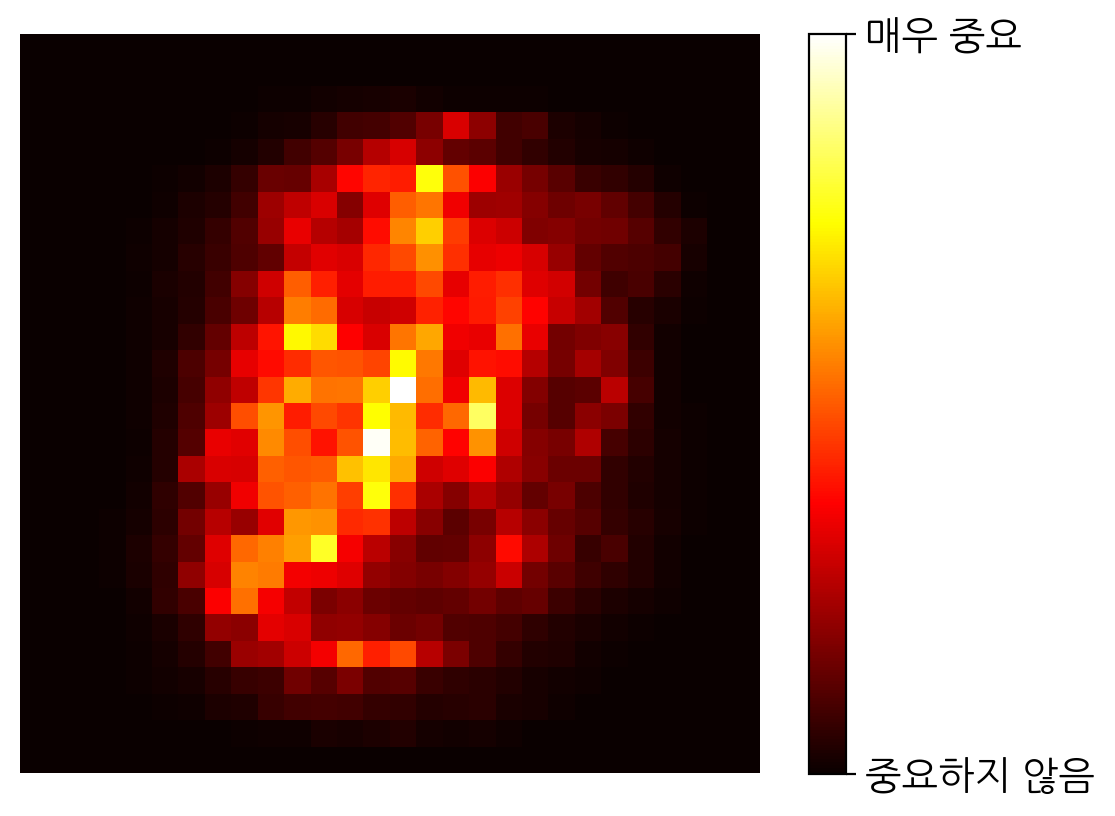

In [84]:
# 추가 코드 - 이 셀은 그림 7-6을 생성하고 저장합니다.

from sklearn.datasets import fetch_openml

# 사이킷런 1.4버전에서 parser 매개변수 기본값이 'liac-arff'에서 'auto'로 바뀌었습니다.
# 이전 버전에서도 동일한 결과를 내도록 명시적으로 'auto'로 지정합니다.
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True,
                                as_frame=False, parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['중요하지 않음', '매우 중요'], fontsize=14)
plt.axis("off")
plt.show()

## 부스팅
- 부스팅(boosting)은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법
- 앞의 예측기를 보완해 나가면서 일련의 예측기를 학습 시키는 것

### AdaBoost

- 복수개의 연속된 예측기를 학습 시킬 때, 이전 예측기가 과소적합했던 훈련 샘플을 가중치를 더 높여 다음 예측기가 학습하게하는 방식
- 첫 번째 분류기를 훈련 세트에서 훈련 시키고 예측기를 만든다
- 첫 번째 분류기가 잘못 불류한 샘플의 가중치를 상대적으로 높인다
- 두 번째 분류기는 업데이트된 가중치를 사용해 훈련 세트에서 훈련하도 다시 예측을 만든다.

<img src='./images/fig_11_05.png' width=500>

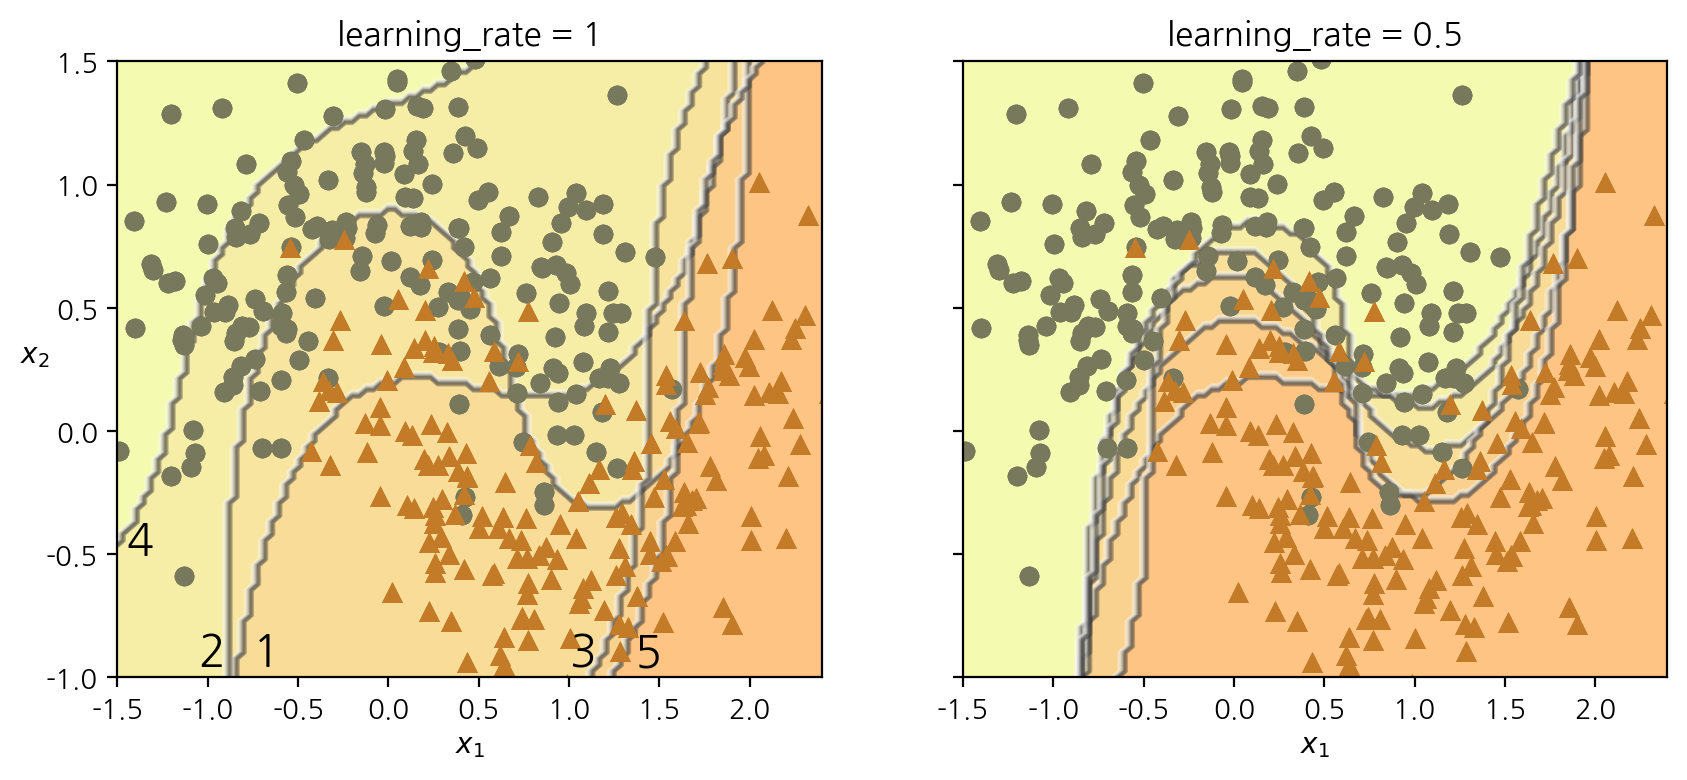

In [85]:
# 추가 코드 - 이 셀은 그림 7-8을 생성하고 저장합니다.

m = len(X_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        error_weights = sample_weights[y_pred != y_train].sum()
        r = error_weights / sample_weights.sum()  # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
        sample_weights /= sample_weights.sum()  # normalization step

        plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
        plt.title(f"learning_rate = {learning_rate}")
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=16)
        plt.text(-1.05, -0.95, "2", fontsize=16)
        plt.text(1.0, -0.95, "3", fontsize=16)
        plt.text(-1.45, -0.5, "4", fontsize=16)
        plt.text(1.36,  -0.95, "5", fontsize=16)
    else:
        plt.ylabel("")

plt.show()

- 왼쪽 첫 번쨰 분류기가 많은 샘플을 잘못 분류 하여 가중치가 높아 짐
- 두 번째 분류기는 이 샘플들을 더 정확하게 예측

### 그레디언트 부스팅
- 그레디언트 부스팅도 AdaBoost 처럼, 앙상블 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가
- 그러나 반복마다 샘플의 가중치를 수정하는 대신, 이전 예측기가 만든 잔여 오차(residual error)에 새로운 예측기를 학습 시킨다
- 간단한 2차방정식 데이터셋을 만들고 여기에 DecisionTreeRegressor를 훈련시켜 보겠습니다:

In [86]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

- 이제 이전 예측기가 만든 잔여 오차에 대해 다른 결정 트리 회귀를 훈련해 보겠습니다.

In [87]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

- 그런 다음 두 번째 예측기가 만든 잔여 오차에서 세 번째 회귀 모델을 훈련

In [88]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

- 세 개의 트리를 포함하는 앙상블 모델이 생겼다.
- 새로운 샘플에 대한 예측을 만들려면 모든 트리의 예측을 더하면 된다.

In [89]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

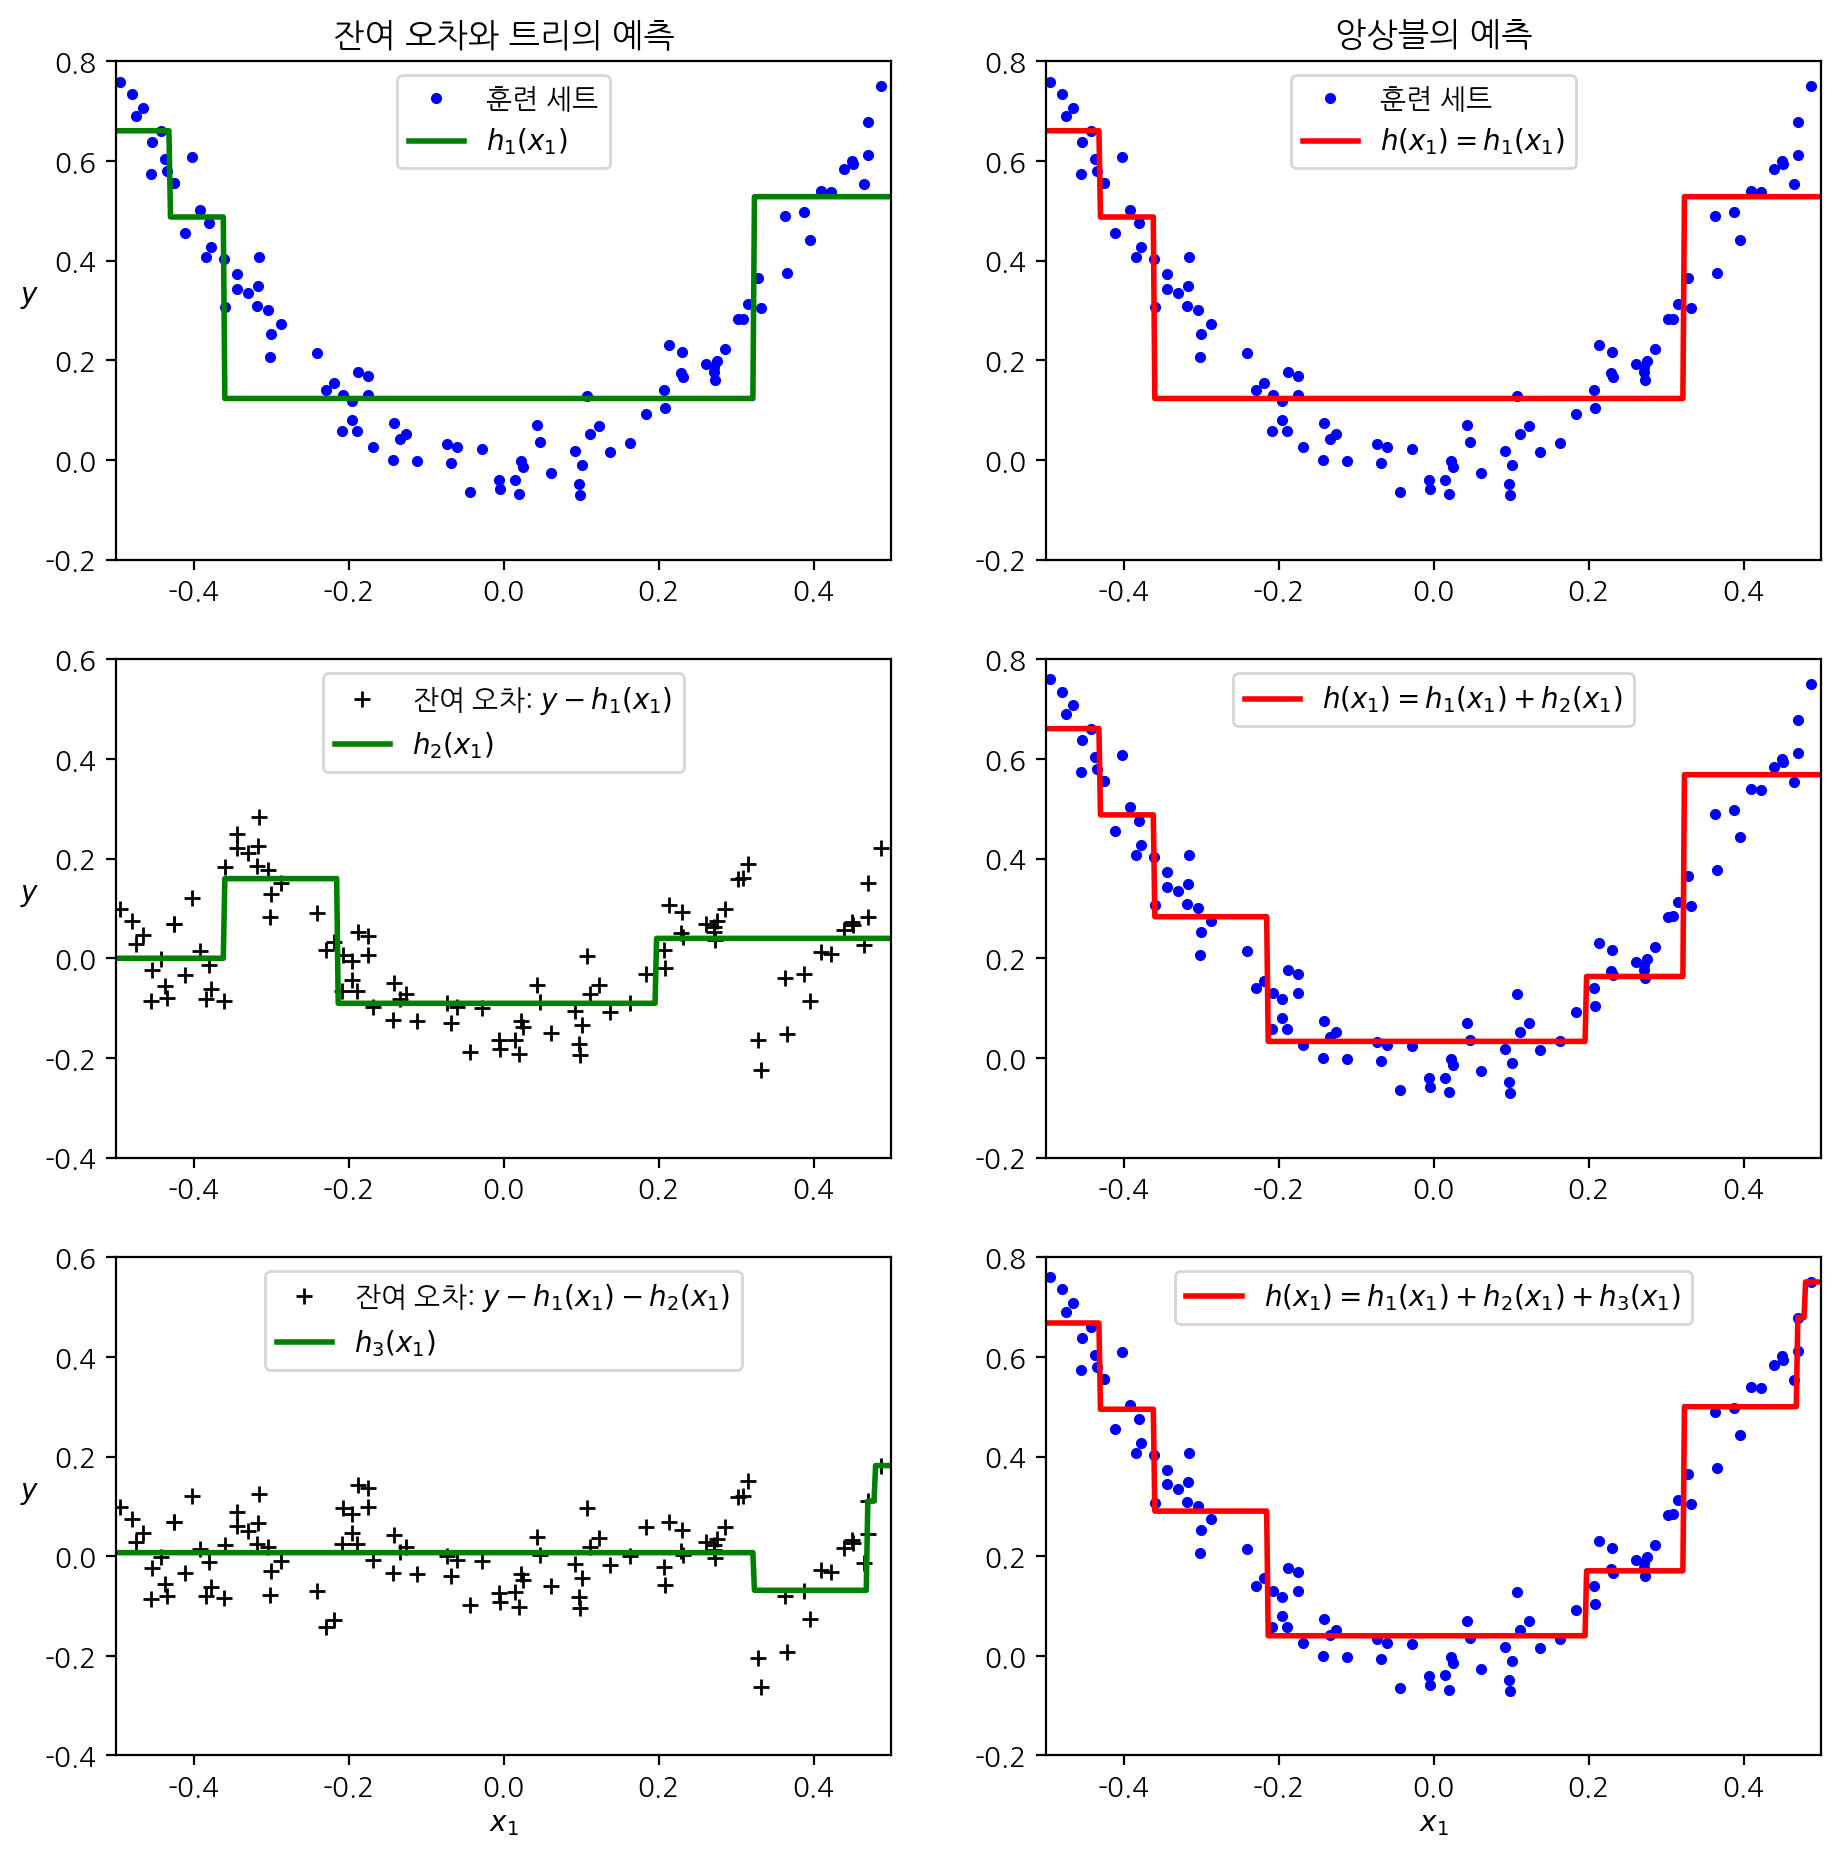

In [90]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="g-",
                 label="$h_1(x_1)$", data_label="훈련 세트")
plt.ylabel("$y$  ", rotation=0)
plt.title("잔여 오차와 트리의 예측")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="훈련 세트")
plt.title("앙상블의 예측")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="잔여 오차: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="잔여 오차: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")
plt.show()

- 왼쪽 열은 이 세 트리의 예측, 오른쪽은 앙상블의 예측
- 첫 번째 행에는 앙상블에 트리 하나만 있어, 첫번째 트리와 동일
- 두번 째 행에는 새로운 트리가 첫번째 트리의 잔여 오차에 의해 학습됨, 오른쪽의 앙상블 예측이 두 개의 트리 예측의 합과 같다
- 비슷하게 세 번째 행엣허는 또 다른 트리가 두 번째 트리의 잔여 오차에 의해 훈련 되었고, 이 트리가 앙상블 예측에 추가 되어, 전체 성능이 향상 됨

- 사이킷런의 GradientBoostingRegressor 를 사용하면 간단하게 GBRT 앙상블 생성 가능

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [92]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [93]:
gbrt_best.n_estimators_

92

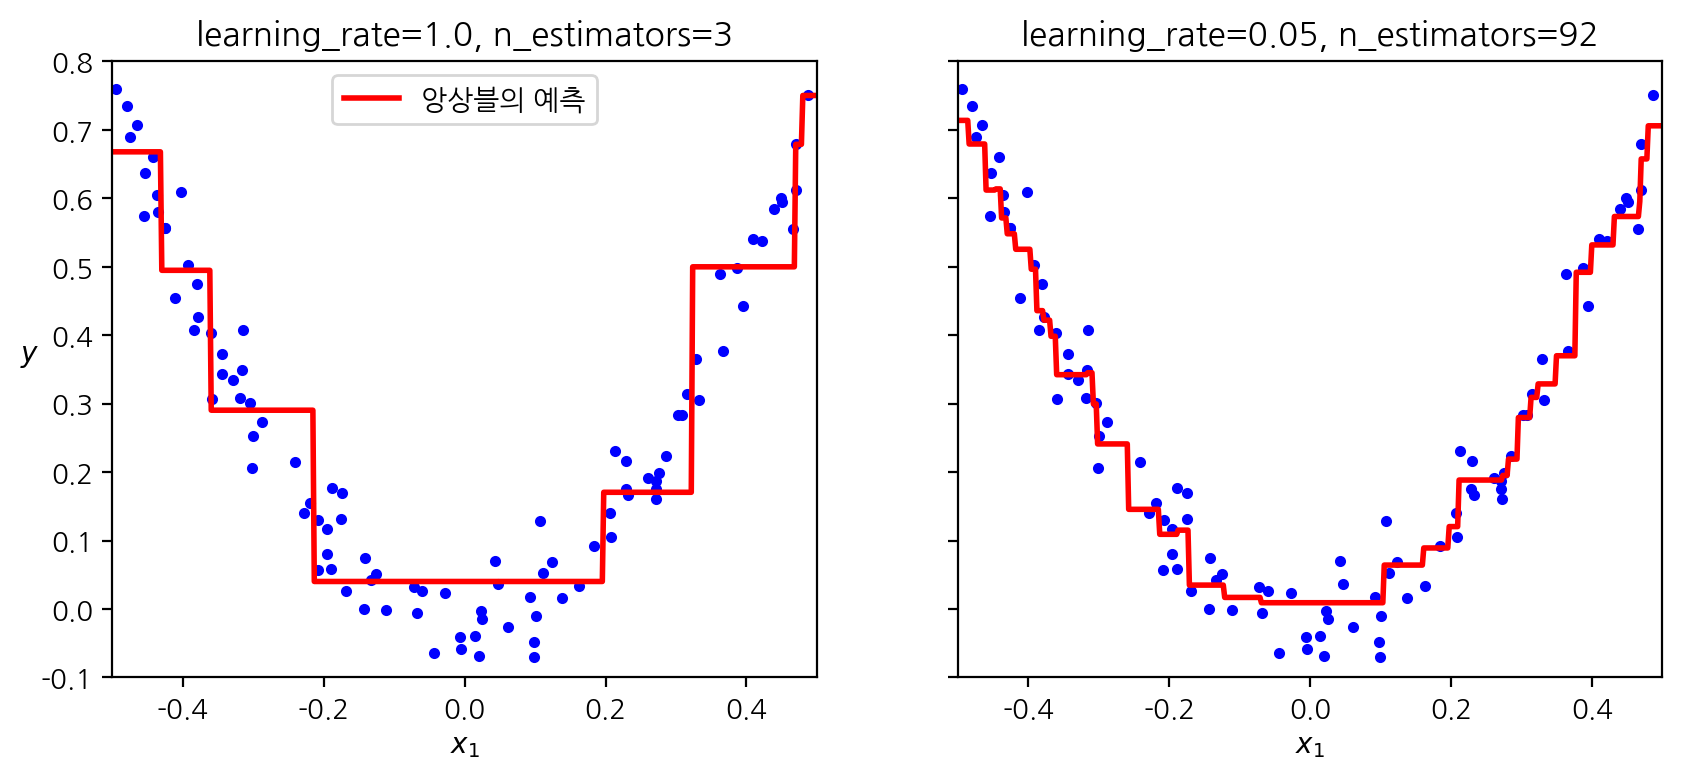

In [94]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="앙상블의 예측")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

plt.show()

# 삼성전자 롱/숏 신호

In [3]:
import pandas as pd
import numpy as np
from pykrx import stock
import talib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

### 데이터 수집 및 전처리
- pykrx 라이브러리를 사용하여 삼성전자 데이터를 수집합니다.

In [18]:
# 삼성전자 주가 데이터 수집
ticker = '005930'  # 삼성전자
df = stock.get_market_ohlcv_by_date("20220101", "20230530", ticker)
df = df.reset_index()
df = df.rename(columns={'날짜': 'Date', '종가': 'Close', '거래량': 'Volume'})
df.head()

,Date,시가,고가,저가,Close,Volume,등락률
0,2022-01-03,79400,79800,78200,78600,13502112,0.383142
1,2022-01-04,78800,79200,78300,78700,12427416,0.127226
2,2022-01-05,78800,79000,76400,77400,25470640,-1.651842
3,2022-01-06,76700,77600,76600,76900,12931954,-0.645995
4,2022-01-07,78100,78400,77400,78300,15163757,1.820546


###  특징 엔지니어링
- 기술적 지표 생성: 이동 평균, RSI, MACD 등 다양한 기술적 지표를 생성합니다.

In [19]:
# 기술적 지표 생성
df['SMA'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df.head()

,Date,시가,고가,저가,Close,Volume,등락률,SMA,RSI,MACD,MACD_signal,MACD_hist
0,2022-01-03,79400,79800,78200,78600,13502112,0.383142,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,78800,79200,78300,78700,12427416,0.127226,NaN,NaN,NaN,NaN,NaN
2,2022-01-05,78800,79000,76400,77400,25470640,-1.651842,NaN,NaN,NaN,NaN,NaN
3,2022-01-06,76700,77600,76600,76900,12931954,-0.645995,NaN,NaN,NaN,NaN,NaN
4,2022-01-07,78100,78400,77400,78300,15163757,1.820546,NaN,NaN,NaN,NaN,NaN


### 라벨 생성
- 예측하려는 목표 변수 설정 (예: 다음 기간의 주가 상승/하락).

In [20]:
df['Return'] = df['Close'].pct_change(5)
df['Label'] = np.where(df['Return'] > 0, 1, 0)

In [21]:
df.head()

,Date,시가,고가,저가,Close,Volume,등락률,SMA,RSI,MACD,MACD_signal,MACD_hist,Return,Label
0,2022-01-03,79400,79800,78200,78600,13502112,0.383142,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2022-01-04,78800,79200,78300,78700,12427416,0.127226,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2022-01-05,78800,79000,76400,77400,25470640,-1.651842,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2022-01-06,76700,77600,76600,76900,12931954,-0.645995,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2022-01-07,78100,78400,77400,78300,15163757,1.820546,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
df.dropna(inplace=True)
df.head()

,Date,시가,고가,저가,Close,Volume,등락률,SMA,RSI,MACD,MACD_signal,MACD_hist,Return,Label
33,2022-02-22,73000,73400,72800,73400,11692469,-1.078167,74025.0,40.456973,-1057.717936,-1471.354200,413.636264,-0.004071,0
34,2022-02-23,73800,73800,72800,73000,10397964,-0.544959,73895.0,38.726581,-1066.819605,-1390.447281,323.627677,-0.024064,0
35,2022-02-24,72300,72300,71300,71500,15759283,-2.054795,73715.0,33.022597,-1181.451173,-1348.648059,167.196887,-0.046667,0
36,2022-02-25,72100,72600,71900,71900,13168484,0.559441,73610.0,35.740656,-1225.889567,-1324.096361,98.206794,-0.032301,0
37,2022-02-28,71100,72100,71000,72100,17781783,0.278164,73550.0,37.114804,-1230.781306,-1305.433350,74.652044,-0.028302,0


In [23]:
# 특징과 라벨 분리
features = ['SMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']
X = df[features]
y = df['Label']

###  모델 학습 및 검증

In [24]:
# 시계열 데이터의 순서를 유지하여 학습 및 테스트 데이터 분리
split_date = '2022-12-31'
X_train = X[df['Date'] <= split_date]
X_test = X[df['Date'] > split_date]
y_train = y[df['Date'] <= split_date]
y_test = y[df['Date'] > split_date]

RandomForestClassifier(max_depth=6, random_state=42)

In [32]:
# 랜덤포레스트 모델 설정
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 교차 검증 점수 확인
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC scores: {cv_scores}")

Cross-validation AUC scores: [0.80238095 0.65166667 0.51666667 0.72249589 0.91954023]


In [33]:
# 4. 예측 및 롱/숏 시그널 생성
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# 예측 결과를 원래 데이터프레임에 병합
df.loc[X_test.index, 'Signal'] = y_pred

In [34]:
# 5. 성과 분석 및 시각화
df['Strategy_Return'] = df['Return'] * df['Signal'].shift(1)
df['Strategy_Return'].fillna(0, inplace=True)

# 비정상적으로 높은 수익률 제한
df['Strategy_Return'] = np.clip(df['Strategy_Return'], -1, 1)

# 누적 수익률 계산
df['Cumulative_Strategy_Return'] = (df['Strategy_Return'] + 1).cumprod() - 1
df['Cumulative_Market_Return'] = (df['Return'] + 1).cumprod() - 1

/tmp/ipykernel_1488392/1734826271.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Strategy_Return'].fillna(0, inplace=True)


In [40]:
# 날짜 필터링
start_date = '2023-03-01'
df_filtered = df[df['Date'] >= start_date]

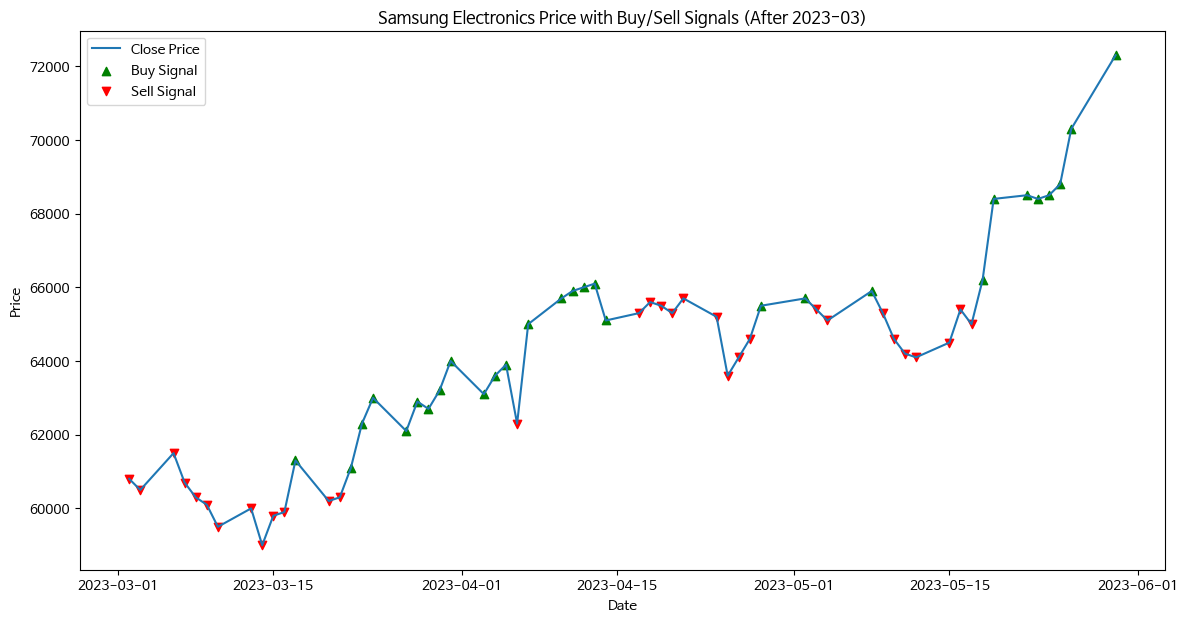

In [41]:
# 주가 차트에 롱/숏 신호 표시
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Close'], label='Close Price')
buy_signals = df_filtered[df_filtered['Signal'] == 1]
sell_signals = df_filtered[df_filtered['Signal'] == 0]
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung Electronics Price with Buy/Sell Signals (After 2023-03)')
plt.show()

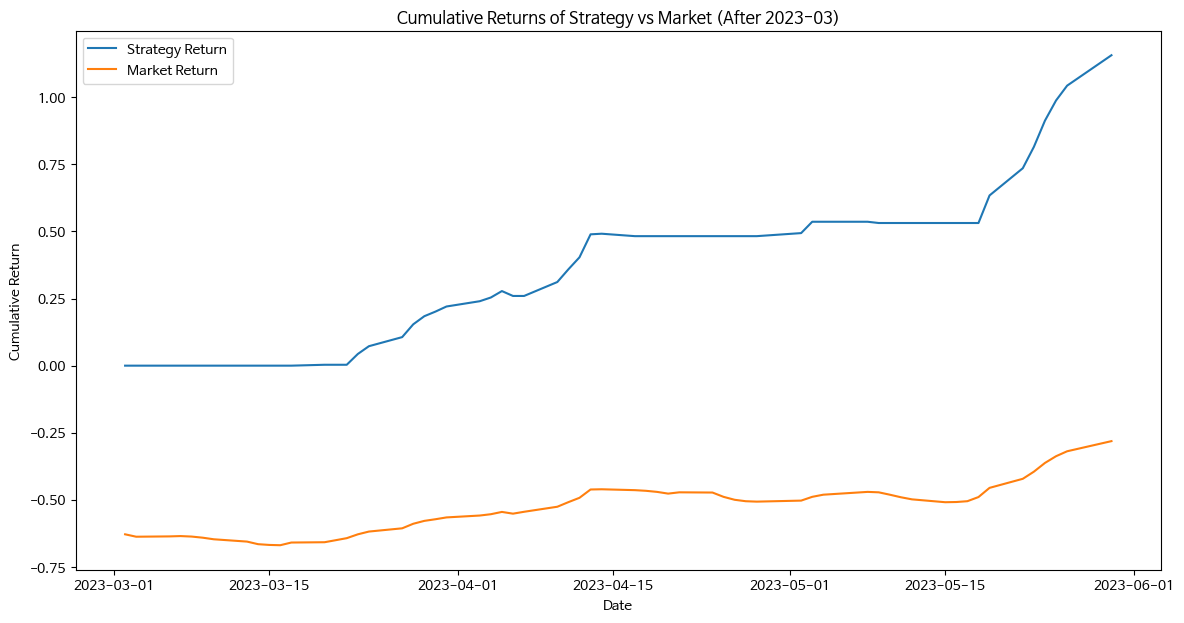

In [42]:
# 누적 수익률 시각화
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Cumulative_Strategy_Return'], label='Strategy Return')
plt.plot(df_filtered['Date'], df_filtered['Cumulative_Market_Return'], label='Market Return')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Strategy vs Market (After 2023-03)')
plt.show()